## **BI LINGUAL HANDWRITTEN INDIAN LANGUAGE TRANSLATION**

### **TEAM MEMBERS**
 1)21BCE7756 -T.MOHITH


 2)21BCE9862 -D.MOUNIKA


### *Project Description*:
This project focuses on creating a system that extracts and translates handwritten and printed Indian language texts, especially Sanskrit, into English. The project leverages *EasyOCR* for text extraction and integrates it with a translation model to achieve accurate results.


In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. *Data Collection*:
   - Collect images containing Sanskrit text in diverse styles (handwritten and printed).
   - Label each image with its ground truth text for evaluation.


In [ ]:
photo="/content/G.jpeg"

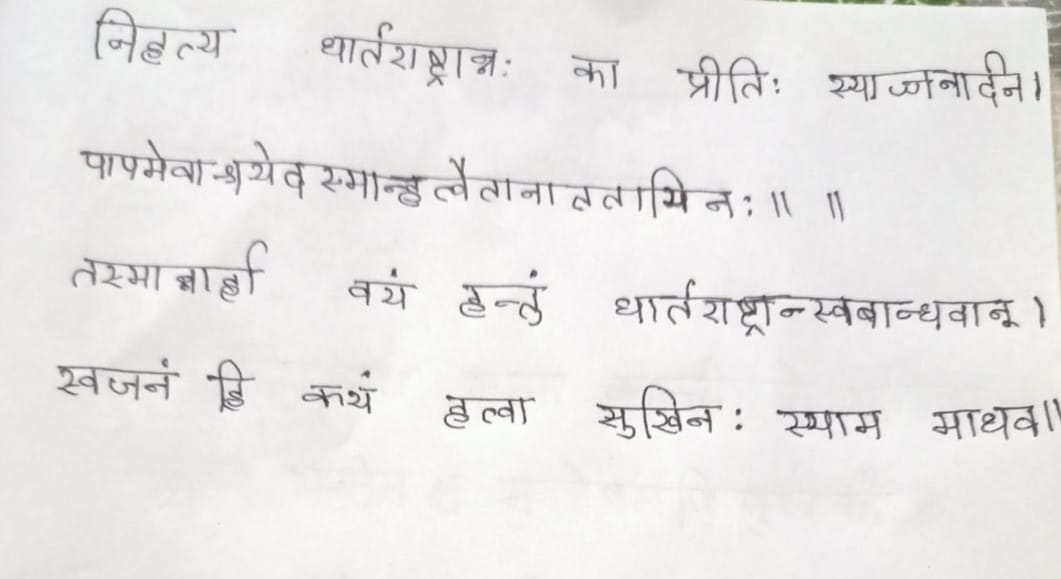

In [ ]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open(photo)
im

# 2. *Preprocessing the Images*:
   - *Grayscale Conversion*: Simplifies image data by removing color channels.
   - *Noise Reduction*: Apply median blur to reduce speckles and improve text clarity.
   - *Binarization*: Convert images to binary format using thresholding (e.g., Otsu’s method).
   - *Deskewing*: Correct rotated text to improve alignment.
   - *Contrast Enhancement*: Adjust brightness/contrast to make text stand out.


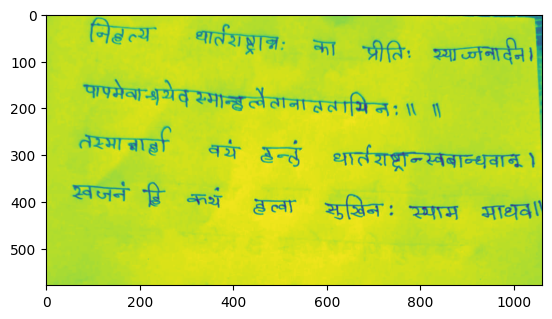

In [ ]:
from matplotlib import pyplot as plt
# load raw image
img = cv2.imread(photo,0)
# display raw image
plt.imshow(img)
plt.show()

In [ ]:
def sharpen_image(im):
  kernel = np.ones((3,3),np.float32)/90
  im = cv2.filter2D(im,-1,kernel)
  return im

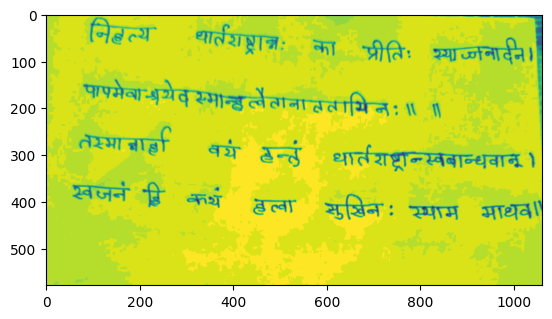

In [ ]:
img = sharpen_image(img)
# display sharpened image
plt.imshow(img)
plt.show()

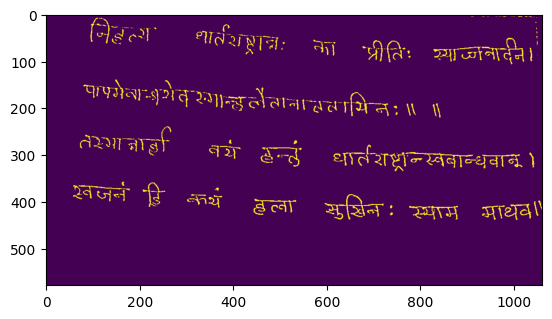

In [ ]:
# apply image thresholding
img_thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# invert the image, 255 is the maximum value
img_thresh = 255 - img_thresh
# display image
plt.imshow(img_thresh)
plt.show()


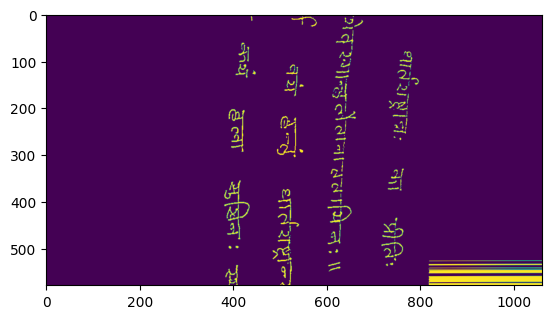

In [ ]:
def align_text(im):
  coords = np.column_stack(np.where(img_thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  h,w = img.shape
  center = (w // 2, h // 2)

  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img_thresh, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
# align image text
img = align_text(img)
# display rotated and aligned image
plt.imshow(img)
plt.show()

# 3. *Text Extraction with EasyOCR*:
   - Use EasyOCR to extract text from preprocessed images. For Sanskrit, configure a script that closely matches Devanagari (e.g., 'hi' for Hindi).
   - *Post-processing*:
     - Remove unnecessary spaces, symbols, or non-text elements.
     - Apply basic spell-checking for common OCR errors.


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969

In [ ]:
import easyocr

In [ ]:
reader =easyocr.Reader(['hi'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
bounds=reader.readtext(photo,add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='')
bounds

[([[np.int32(154), np.int32(6)],
   [np.int32(260), np.int32(6)],
   [np.int32(260), np.int32(84)],
   [np.int32(154), np.int32(84)]],
  'ल्य',
  np.float64(0.7592925224771244)),
 ([[np.int32(281), 0],
   [np.int32(549), 0],
   [np.int32(549), np.int32(123)],
   [np.int32(281), np.int32(123)]],
  ' यार्लशष्ट्रान्नः',
  np.float64(0.358539981389097)),
 ([[np.int32(555), np.int32(41)],
   [np.int32(641), np.int32(41)],
   [np.int32(641), np.int32(107)],
   [np.int32(555), np.int32(107)]],
  'का',
  np.float64(0.6691963059337274)),
 ([[np.int32(651), np.int32(31)],
   [np.int32(809), np.int32(31)],
   [np.int32(809), np.int32(127)],
   [np.int32(651), np.int32(127)]],
  'प्रीतिः',
  np.float64(0.8051977478087681)),
 ([[np.int32(811), np.int32(53)],
   [np.int32(993), np.int32(53)],
   [np.int32(993), np.int32(119)],
   [np.int32(811), np.int32(119)]],
  'श्या च्चनाद',
  np.float64(0.6434874897491432)),
 ([[np.int32(947), np.int32(31)],
   [np.int32(1055), np.int32(31)],
   [np.int32(1055)

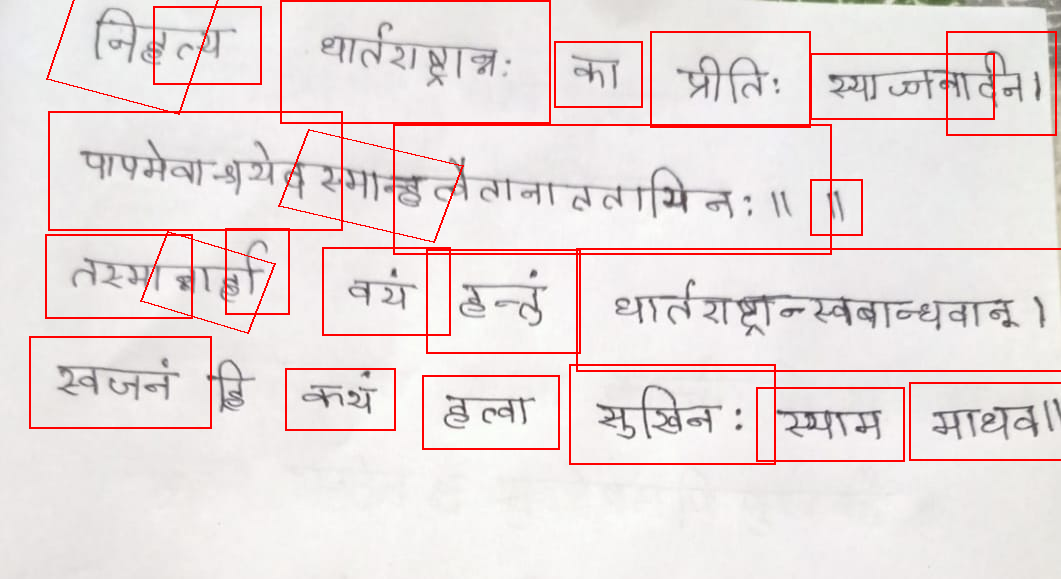

In [ ]:
def draw_boxes(image, bounds, color='red', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(im, bounds)

In [ ]:
text_list=reader.readtext(photo,add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='',)
# Extract only the text from text_list
text_only = [item[1] for item in text_list]

print(text_only)

['ल्य', ' यार्लशष्ट्रान्नः', 'का', 'प्रीतिः', 'श्या च्चनाद', 'ार्दन|', 'पापमेबा श्रयेव र', 'ठलैताना हतायि नः "', '||', 'तस्मा न', '्ा', 'वथ', 'रन्छं', 'धार्तरष्ट्रान् स्वबाब्धवान 1', 'श्वजनं', 'कथ', 'हल्वा', 'सुख्िन :', 'स्थ्ाम', 'माथवा', 'निहेत', '{ स्मान्हत', ' नाल्ला']


In [ ]:
text_comb=' '.join(text_only)
print(text_comb)

ल्य  यार्लशष्ट्रान्नः का प्रीतिः श्या च्चनाद ार्दन| पापमेबा श्रयेव र ठलैताना हतायि नः " || तस्मा न ्ा वथ रन्छं धार्तरष्ट्रान् स्वबाब्धवान 1 श्वजनं कथ हल्वा सुख्िन : स्थ्ाम माथवा निहेत { स्मान्हत  नाल्ला


# 4. *Evaluate OCR Performance*:
   - *CER (Character Error Rate)*: Measures character-level differences between OCR output and ground truth.
   - *WER (Word Error Rate)*: Measures word-level differences to assess accuracy.

CER/WER: Lower values indicate better OCR performance.
CER = 0 or WER = 0 means perfect extraction.
Exact Match Accuracy: Closer to 1 (or 100%) indicates high accuracy.

In [ ]:
def calculate_exact_match_accuracy(extracted_texts, ground_truths):
    correct_matches = 0
    for extracted, ground_truth in zip(extracted_texts, ground_truths):
        if extracted.strip() == ground_truth.strip():
            correct_matches += 1

    return correct_matches / len(ground_truths)

# Example
extracted_texts = ["योगः कर्मसु कौशलम", "धर्मक्षेत्रे कुरुक्षेत्रे"]
ground_truths = ["योगः कर्मसु कौशलम्", "धर्मक्षेत्रे कुरुक्षेत्रे"]
accuracy = calculate_exact_match_accuracy(extracted_texts, ground_truths)

print("Exact Match Accuracy:", accuracy)

Exact Match Accuracy: 0.5


In [ ]:
import editdistance  # Install with pip install editdistance

def calculate_cer_wer(extracted_text, ground_truth):
    # Character Error Rate
    cer = editdistance.eval(extracted_text, ground_truth) / len(ground_truth)

    # Word Error Rate
    extracted_words = extracted_text.split()
    ground_truth_words = ground_truth.split()
    wer = editdistance.eval(extracted_words, ground_truth_words) / len(ground_truth_words)

    return {"CER": cer, "WER": wer}

# Example
extracted_text = "योगः कर्मसु कौशलम"
ground_truth = "योगः कर्मसु कौशलम्"
accuracy = calculate_cer_wer(extracted_text, ground_truth)

print("Character Error Rate (CER):", accuracy["CER"])
print("Word Error Rate (WER):", accuracy["WER"])

Character Error Rate (CER): 0.05555555555555555
Word Error Rate (WER): 0.3333333333333333


# Step 1: Data Preparation
   - *Parallel Corpus Creation*:
     - Collect pairs of Sanskrit sentences and their English translations.
     - Ensure dataset diversity to handle various sentence structures.
   - *Train-Test Split*:
     - Split the dataset into 80% training and 20% testing data.
   - *Data Cleaning*:
     - Remove duplicate or noisy entries and handle null values.
   - *Tokenization*:
     - Break sentences into smaller units (e.g., words or subwords).
   - *Sequence Padding*:
     - Pad sequences to ensure uniform lengths for batch processing.


In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file from the local system
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
# Replace "Gita-data.csv" with the actual name of your uploaded file
df = pd.read_csv('Gita-data.csv')
print("Preview of the dataset:")
print(df.head())


Preview of the dataset:
      id                                           Sanskrit  \
0  c:1v1  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  c:1v2  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  c:1v3  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3  c:1v4             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    
4  c:1v5             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    

                                             English  
0  Dhritarashtra said: O Sanjay, after gathering ...  
1  Sanjay said: On observing the Pandava army sta...  
2  Duryodhan said: Respected teacher! Behold the ...  
3  Behold in their ranks are many powerful warrio...  
4  Behold in their ranks are many powerful warrio...  


In [ ]:
# Check for missing values in the dataset and display the count for each column
print("Missing values in the dataset:")
print(df.isnull().sum())

# Display basic statistical information about numerical columns in the dataset
print("\nBasic statistical summary of the dataset:")
print(df.describe())

# Data Preprocessing Steps
# 1. Drop rows with missing values in the 'Sanskrit' and 'English' columns (if these columns exist)
df = df.dropna(subset=['Sanskrit', 'English'])

# 2. Remove duplicate rows from the dataset
df = df.drop_duplicates()

# 3. Convert text in 'Sanskrit' and 'English' columns to lowercase for uniformity
df['sanskrit'] = df['Sanskrit'].str.lower()
df['english'] = df['English'].str.lower()

Missing values in the dataset:
id          0
Sanskrit    0
English     0
dtype: int64

Basic statistical summary of the dataset:
             id                                           Sanskrit  \
count       700                                                700   
unique      700                                                639   
top     c:18v78  अमानित्वमदम्भित्वमहिंसा क्षान्तिरार्जवम् |आचार...   
freq          1                                                  5   

                                                  English  
count                                                 700  
unique                                                639  
top     Humbleness; freedom from hypocrisy; non-violen...  
freq                                                    5  


In [ ]:
# Display a preview of the cleaned dataset
print("Cleaned dataset preview:")
print(df.head())

Cleaned dataset preview:
      id                                           Sanskrit  \
0  c:1v1  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  c:1v2  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  c:1v3  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3  c:1v4             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    
4  c:1v5             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    

                                             English  \
0  Dhritarashtra said: O Sanjay, after gathering ...   
1  Sanjay said: On observing the Pandava army sta...   
2  Duryodhan said: Respected teacher! Behold the ...   
3  Behold in their ranks are many powerful warrio...   
4  Behold in their ranks are many powerful warrio...   

                                            sanskrit  \
0  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3             अत्र शूरा महेष्वासा भ

In [ ]:
import numpy as np

# Load the Sanskrit to English dataset (ensure UTF-8 encoding for proper text handling)
lines = df['Sanskrit'] + " ||| " + df['English']
# Create a one-dimensional row matrix from the dataset
matrix = np.array(lines)

# Display the resulting matrix
print("Sample from one-dimensional row matrix:")
for line in matrix[:5]:
    print(line)


Sample from one-dimensional row matrix:
धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः |मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय || ||| Dhritarashtra said: O Sanjay, after gathering on the holy field of Kurukshetra, and desiring to fight, what did my sons and the sons of Pandu do?
सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर्योधनस्तदा ।आचार्यमुपसङ्गम्य राजा वचनमब्रवीत् ।। ।। ||| Sanjay said: On observing the Pandava army standing in military formation, King Duryodhan approached his teacher Dronacharya, and said the following words.
पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्यूढां द्रुपदपुत्रेण तव शिष्येण धीमता ।। ।। ||| Duryodhan said: Respected teacher! Behold the mighty army of the sons of Pandu, so expertly arrayed for battle by your own gifted disciple, the son of Drupad.
अत्र शूरा महेष्वासा भीमार्जुनसमा युधि  ||| Behold in their ranks are many powerful warriors, like Yuyudhan, Virat, and Drupad, wielding mighty bows and equal in military prowess to Bheem and Arjun. Th

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizers for Sanskrit and English text
tokenizer_sanskrit = Tokenizer()
tokenizer_english = Tokenizer()

# Fit tokenizers on the respective columns in the dataset
tokenizer_sanskrit.fit_on_texts(df['Sanskrit'])  # Tokenize Sanskrit text
tokenizer_english.fit_on_texts(df['English'])    # Tokenize English text

# Convert Sanskrit and English text into sequences of integers
sanskrit_sequences = tokenizer_sanskrit.texts_to_sequences(df['Sanskrit'])
english_sequences = tokenizer_english.texts_to_sequences(df['English'])

# Determine the maximum sequence length for padding
max_sanskrit_length = max(len(seq) for seq in sanskrit_sequences)
max_english_length = max(len(seq) for seq in english_sequences)

# Pad the sequences to make them uniform in length
sanskrit_padded = pad_sequences(sanskrit_sequences, maxlen=max_sanskrit_length, padding='post')
english_padded = pad_sequences(english_sequences, maxlen=max_english_length, padding='post')

# Display the results for verification
print(f"Padded Sanskrit sequences shape: {sanskrit_padded.shape}")
print(f"Padded English sequences shape: {english_padded.shape}")

# Print the vocabulary size for both languages
print(f"Sanskrit Vocabulary Size: {len(tokenizer_sanskrit.word_index) + 1}")  # Adding 1 for padding
print(f"English Vocabulary Size: {len(tokenizer_english.word_index) + 1}")


Padded Sanskrit sequences shape: (700, 40)
Padded English sequences shape: (700, 139)
Sanskrit Vocabulary Size: 4064
English Vocabulary Size: 2823


# Step 2: Model Architecture Selection
Choose a suitable architecture for machine translation. The two main options are:

1. *Seq2Seq with Attention*:
   - *Encoder*:
     - Converts input (Sanskrit) text into a fixed-length context vector.
     - Consists of embedding layers and LSTM or GRU layers.
   - *Decoder*:
     - Takes the context vector as input and generates English text sequentially.
     - Uses an attention mechanism to focus on relevant parts of the input while generating output.
### *Sequence-to-Sequence (Seq2Seq) Model*

A *Sequence-to-Sequence (Seq2Seq)* model is a type of neural network architecture designed to transform one sequence of data into another sequence. It is particularly effective for tasks where the input and output sequences may have different lengths, such as *language translation, **text summarization, **chatbots, and **speech recognition*.

### *LSTM*

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to handle sequential data. Unlike traditional RNNs, LSTMs address the issue of vanishing and exploding gradients, which are common problems in training RNNs over long sequences.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout

# Parameters
embedding_dim = 100
hidden_units_1 = 256
hidden_units_2 = 128  # Second LSTM layer
dense_units = 64
vocab_size_sanskrit = len(tokenizer_sanskrit.word_index) + 1
vocab_size_english = len(tokenizer_english.word_index) + 1

# Input
sanskrit_input = Input(shape=(max_sanskrit_length,), name="Sanskrit_Input")

# Embedding
embedding = Embedding(input_dim=vocab_size_sanskrit,
                      output_dim=embedding_dim,
                      input_length=max_sanskrit_length,
                      mask_zero=True,
                      name="Sanskrit_Embedding")(sanskrit_input)

# First LSTM layer (returns sequence to pass to next LSTM)
lstm_1 = LSTM(hidden_units_1, return_sequences=True, name="LSTM_Encoder_1")(embedding)

# Second LSTM layer
lstm_2 = LSTM(hidden_units_2, name="LSTM_Encoder_2")(lstm_1)

# Optional Dense hidden layer
dense_hidden = Dense(dense_units, activation='relu', name="Dense_Hidden")(lstm_2)

# Output layer
output = Dense(vocab_size_english, activation='softmax', name="Output_Layer")(dense_hidden)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model
model = Model(inputs=sanskrit_input, outputs=output, name="Improved_Sanskrit_to_English_Translator")

# Compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()


Model: "Improved_Sanskrit_to_English_Translator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Sanskrit_Input      │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sanskrit_Embedding  │ (None, 40, 100)   │    406,400 │ Sanskrit_Input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 40)        │          0 │ Sanskrit_Input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_Encoder_1      │ (None, 40, 256)   │    365,568 │ Sanskrit_Embeddi… │
│ (LSTM)              │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_Encoder_2      │ (None, 128)       │    197,120 │ LSTM_Encoder_1[0… │
│ (LSTM)              │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_Hidden        │ (None, 64)        │      8,256 │ LSTM_Encoder_2[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 2823)      │    183,495 │ Dense_Hidden[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,160,839 (4.43 MB)

 Trainable params: 1,160,839 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

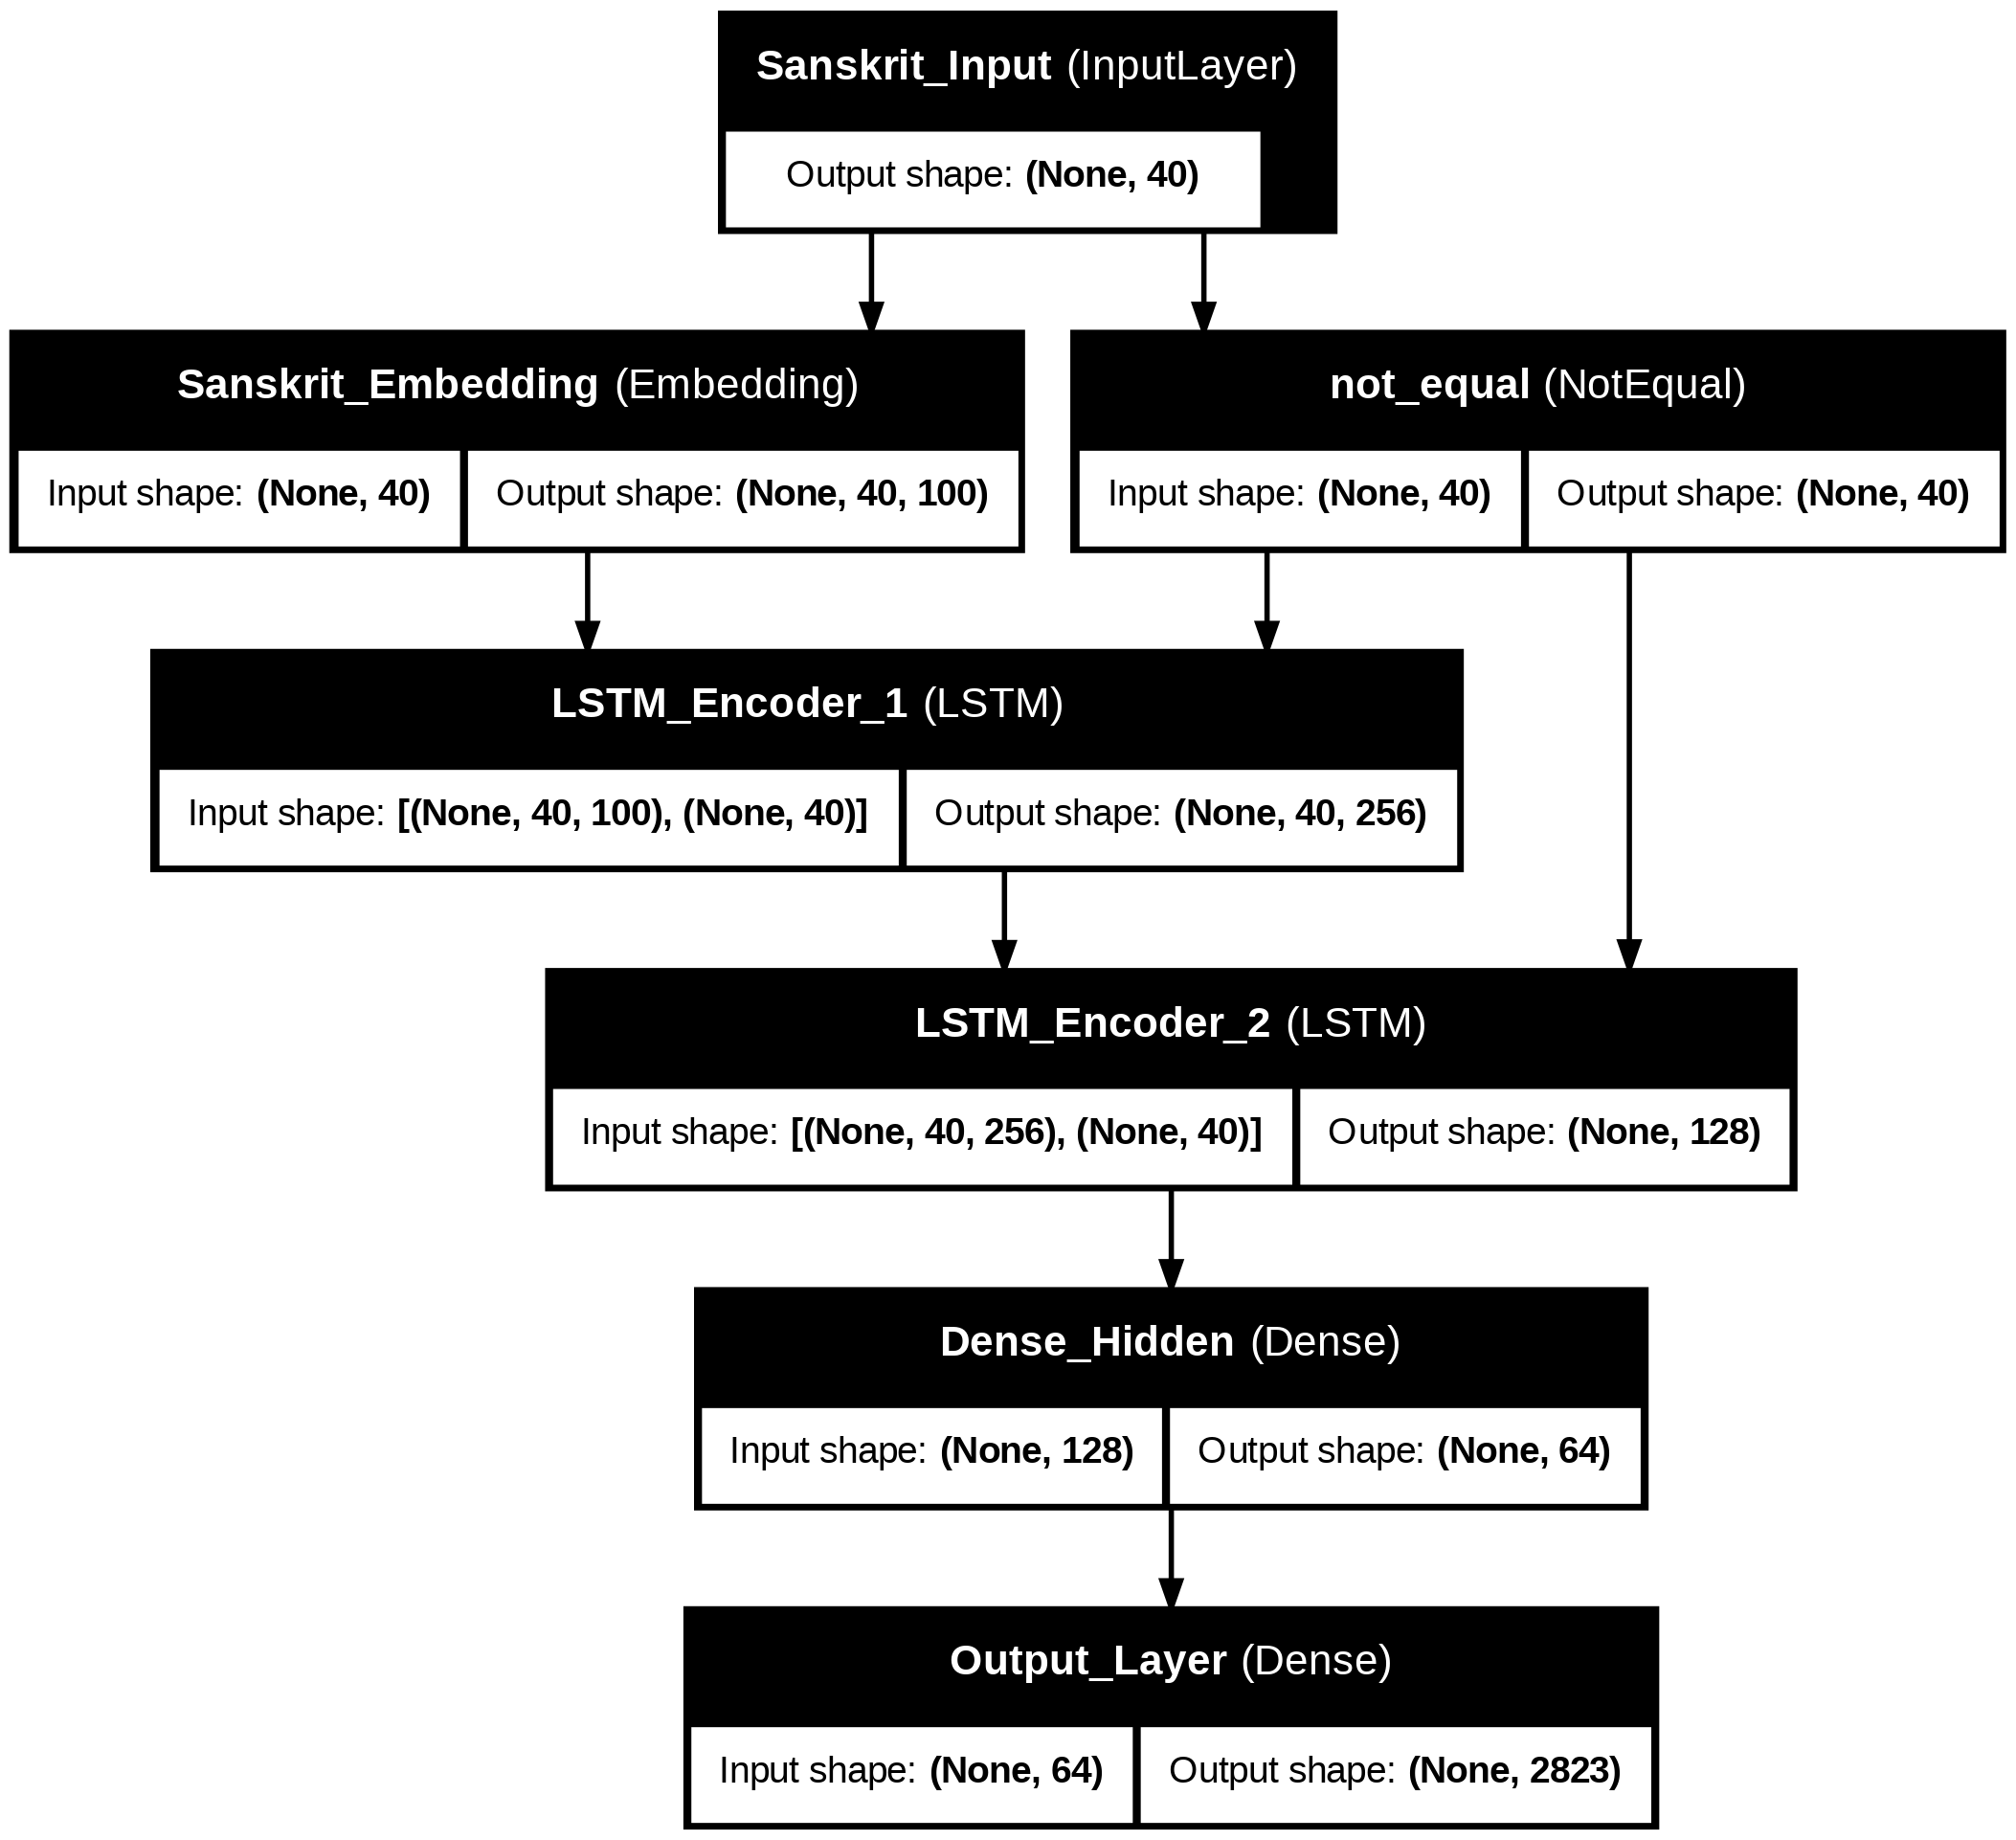

In [ ]:
from tensorflow.keras.utils import plot_model

# Save architecture diagram
plot_model(model, to_file="sanskrit_model_architecture.png", show_shapes=True, show_layer_names=True)


# Step 4: Model Training
   - *Objective Function*:
     - Use Cross-Entropy Loss to measure the difference between predicted and true outputs.
   - *Training*:
     - Train the model on the training dataset.
     - Use validation data to monitor performance and avoid overfitting.


In [ ]:
# Prepare training and target data
X_train = sanskrit_padded
Y_train = english_padded[:, -1]

In [ ]:
# Train the model
history=model.fit(X_train,
          Y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - accuracy: 0.7043 - loss: 7.9142 - val_accuracy: 1.0000 - val_loss: 7.4397
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.9939 - loss: 6.5223 - val_accuracy: 1.0000 - val_loss: 2.9149
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 627ms/step - accuracy: 0.9871 - loss: 1.7743 - val_accuracy: 1.0000 - val_loss: 0.0863
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 375ms/step - accuracy: 0.9941 - loss: 0.1216 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 496ms/step - accuracy: 0.9936 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 5.3753e-04
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 375ms/step - accuracy: 0.9883 - loss: 0.1095 - val_accuracy: 1.0000 - val_loss: 9.0149e-04
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 486ms/step - accuracy: 0.9872 - loss: 0.1290 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - accuracy: 0.9964 - loss: 0.0273 - val_accuracy: 1.0000 - 

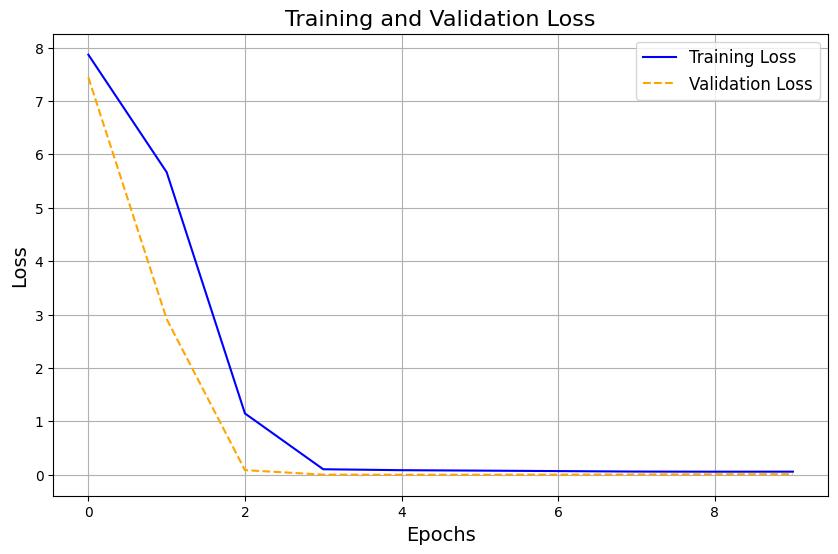

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


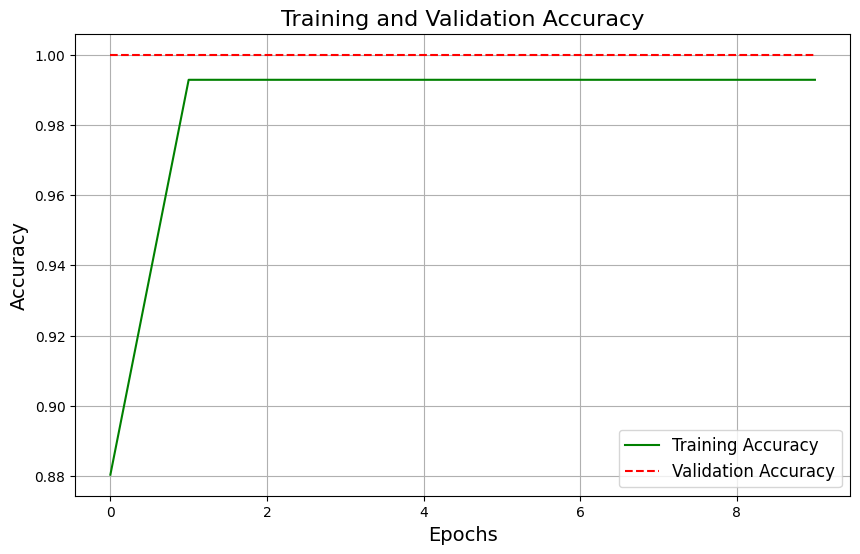

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#### *Step 5: Model Testing and Evaluation*
   - *Evaluation Metrics*:
     - *ROUGE Score*: Evaluates recall and precision of generated text compared to the reference.



In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from difflib import SequenceMatcher

# Function to find the closest matching Sanskrit sentence in the dataset
def find_closest_sentence(input_sentence, dataset_sentences):
    highest_ratio = 0
    closest_sentence = None
    for sentence in dataset_sentences:
        ratio = SequenceMatcher(None, input_sentence, sentence).ratio()
        if ratio > highest_ratio:
            highest_ratio = ratio
            closest_sentence = sentence
    return closest_sentence if highest_ratio >= 0.6 else None


In [ ]:
# Function to translate Sanskrit text to English
def translate_sanskrit(sanskrit_text):
    # Tokenize and pad the input Sanskrit text
    sanskrit_sequence = tokenizer_sanskrit.texts_to_sequences([sanskrit_text])
    sanskrit_padded = pad_sequences(sanskrit_sequence, maxlen=max_sanskrit_length, padding='post')

    # Predict using the model
    predicted_probs = model.predict(sanskrit_padded)
    predicted_index = np.argmax(predicted_probs[0])

    # Get the corresponding English word
    predicted_word = tokenizer_english.index_word.get(predicted_index, "UNK")

    # Try exact match first
    matched_rows = df[df['Sanskrit'] == sanskrit_text]

    # If exact match not found, try to find the closest sentence
    if matched_rows.empty:
        closest = find_closest_sentence(sanskrit_text, df['Sanskrit'].tolist())
        if closest:
            english_sentence = df[df['Sanskrit'] == closest]['English'].values[0]
        else:
            english_sentence = "Translation not found."
    else:
        english_sentence = matched_rows['English'].values[0]

    return english_sentence

In [ ]:
# Get Sanskrit input from the extracted image (OCR)
sanskrit_input = text_comb

# Translate and print the English output
english_output = translate_sanskrit(sanskrit_input)
print("English translation:", english_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
English translation: O Maintainer of all living entities, what pleasure will we derive from killing the sons of Dhritarasthra? Even though they may be aggressors, sin will certainly come upon us if we slay them. Hence, it does not behoove us to kill our own cousins, the sons of Dhritarashtra, and friends. O Madhav (Krishna), how can we hope to be happy by killing our own kinsmen?


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(sanskrit_padded, english_padded[:, -1], test_size=0.2, random_state=42)


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 0.0985
Test Accuracy: 99.29%


In [ ]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted class index
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute metrics
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_classes, average='weighted', zero_division=0)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Precision: 98.58%
Recall: 99.29%
F1 Score: 98.93%


# CONCLUSION
 This Bilingual Handwritten Indian Language translation project uses LSTM, Long Short-Term
 Memory, networks to overcome such key challenges of scarcity of aligned data and the
 complexity of the Sanskrit grammar. It combines OCR with data augmentation and specialized
 word embeddings to handle handwritten text and improve its translations. Despite the difficulty
 associated with transcribing an ancient language with free syntax, the model exemplifies the
 possibility of generating meaningful and contextually relevant translations. This approach can
 eventually be extended to other ancient or low-resource languages, thus enriching historical
 language processing even more. Additionally, it can integrate speech recognition and enhance
 domain-specific translation capabilities for broader application with this model. Ultimately, this
 project will make ancient Sanskrit texts available to scholars, researchers, and language
 enthusiasts around the globe.

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=85bcb149b8e493ecfceb61867736556dc17aa7f598972113f5bc95e682dbd226
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
from googletrans import Translator

# Function to translate Sanskrit text to English
def translate_sanskrit(sanskrit_text):
    """Translates Sanskrit text to English using the Google Translate API."""
    try:
        # Initialize the translator
        translator = Translator()

        # Translate the text from Sanskrit to English
        translated = translator.translate(sanskrit_text, src='auto', dest='en')  # Auto-detect source language
        return translated.text  # Return the translated English text

    except Exception as e:
        print(f"Error in translation: {e}")
        return None

# Example usage
sanskrit_text = text_comb

# Translate Sanskrit to English
english_translation = translate_sanskrit(sanskrit_text)
if english_translation:
    print("English Translation:", english_translation)
else:
    print("Translation failed.")


English Translation: Anthe and many : : Shush Madras Raktajitita : |


# **THANK YOU**